In [12]:
import pandas as pd
import numpy as np
#import spacy
import nltk
nltk.download('punkt')
nltk.download('vader_lexicon')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from nltk.sentiment import SentimentIntensityAnalyzer



[nltk_data] Downloading package punkt to /home/mario/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/mario/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [13]:
#Carga de archivos
df_visitas = pd.read_excel('DatosProyectoFinal/Lista visitas.xlsx')
df_resultados = pd.read_excel('DatosProyectoFinal/Resultados .xlsx')

/usr/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [14]:
#print(df_resultados)
#print(df_resultados.info())
#print(df_resultados.describe())

#print(df_resultados.isnull().sum())

#df_resultados.replace('null', np.nan, inplace=True)
resultados_no_cumple = df_resultados[df_resultados['Respuesta'] == 'NO CUMPLE']

df_resultados['Observación visitador'] = df_resultados['Observación visitador'].fillna('')


# Descargar stopwords si es necesario
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

def limpiar_texto(texto):
    # Tokenizar el texto
    tokens = word_tokenize(texto.lower())
    
    # Eliminar stopwords y signos de puntuación
    tokens_limpios = [token for token in tokens if token not in stop_words and token not in string.punctuation]
    
    return ' '.join(tokens_limpios)

# Aplica la función a las observaciones
df_resultados['observaciones_limpias'] = df_resultados['Observación visitador'].apply(limpiar_texto)

resultados_no_cumple

[nltk_data] Downloading package stopwords to /home/mario/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Código visita,Número visita,Número total visita,Fecha planeada inicio,Instrumento,Estado visita,Número pregunta,Item,Pregunta,Respuesta,...,Validado revisor,Miniatura,Descargar evidencia,Obligación contractual,Código Dane municipio,Nombre municipio,Código Dane Ied,Nombre IED,Código Dane Sede,Nombre sede
2,BO-A-240527,1.0,1.0,2024-05-27,Bodega RI,Validado,3.0,30,Se cuenta con las fichas técnicas en medio fís...,NO CUMPLE,...,Si,NaN,NaN,NaN,8001,BARRANQUILLA,NaN,NaN,NaN,PARQUE INDUSTRIAL CLAVERIA KM.7
21,BO-A-240527,1.0,1.0,2024-05-27,Bodega RI,Validado,22.0,220,Las instalaciones y/o los alimentos se encuent...,NO CUMPLE,...,Si,NaN,"<a href=""f?p=101:1:1092878720710:APPLICATION_P...",NaN,8001,BARRANQUILLA,NaN,NaN,NaN,PARQUE INDUSTRIAL CLAVERIA KM.7
36,BO-A-240527,1.0,1.0,2024-05-27,Bodega RI,Validado,37.0,370,El almacenamiento de las devoluciones a la emp...,NO CUMPLE,...,Si,NaN,"<a href=""f?p=101:1:1092878720710:APPLICATION_P...",NaN,8001,BARRANQUILLA,NaN,NaN,NaN,PARQUE INDUSTRIAL CLAVERIA KM.7
38,BO-A-240527,1.0,1.0,2024-05-27,Bodega RI,Validado,39.0,390,Las materias primas y/o producto terminado son...,NO CUMPLE,...,Si,NaN,NaN,NaN,8001,BARRANQUILLA,NaN,NaN,NaN,PARQUE INDUSTRIAL CLAVERIA KM.7
41,BO-A-240527,1.0,1.0,2024-05-27,Bodega RI,Validado,42.0,420,"Los espacios de la bodega ( pisos, paredes, te...",NO CUMPLE,...,Si,NaN,"<a href=""f?p=101:1:1092878720710:APPLICATION_P...",NaN,8001,BARRANQUILLA,NaN,NaN,NaN,PARQUE INDUSTRIAL CLAVERIA KM.7
43,BO-A-240527,1.0,1.0,2024-05-27,Bodega RI,Validado,44.0,440,Las frutas y verduras almacenadas se encuentra...,NO CUMPLE,...,Si,NaN,"<a href=""f?p=101:1:1092878720710:APPLICATION_P...",NaN,8001,BARRANQUILLA,NaN,NaN,NaN,PARQUE INDUSTRIAL CLAVERIA KM.7
45,BO-A-240527,1.0,1.0,2024-05-27,Bodega RI,Validado,46.0,460,Los productos se encuentran dentro de un empaq...,NO CUMPLE,...,Si,NaN,"<a href=""f?p=101:1:1092878720710:APPLICATION_P...",NaN,8001,BARRANQUILLA,NaN,NaN,NaN,PARQUE INDUSTRIAL CLAVERIA KM.7
50,BO-A-240527,1.0,1.0,2024-05-27,Bodega RI,Validado,51.0,510,El almacenamiento y apilado de las cajas cumpl...,NO CUMPLE,...,Si,NaN,"<a href=""f?p=101:1:1092878720710:APPLICATION_P...",NaN,8001,BARRANQUILLA,NaN,NaN,NaN,PARQUE INDUSTRIAL CLAVERIA KM.7
54,BO-A-240527,1.0,1.0,2024-05-27,Bodega RI,Validado,55.0,550,Los equipos están fabricados con materiales re...,NO CUMPLE,...,Si,NaN,NaN,NaN,8001,BARRANQUILLA,NaN,NaN,NaN,PARQUE INDUSTRIAL CLAVERIA KM.7
92,BO-A-240607,2.0,2.0,2024-06-07,Bodega RI,Validado,28.0,280,La bodega y los elementos almacenados se encue...,NO CUMPLE,...,Si,NaN,"<a href=""f?p=101:1:1092878720710:APPLICATION_P...",NaN,8001,BARRANQUILLA,NaN,NaN,NaN,PARQUE INDUSTRIAL CLAVERIA KM.7


In [16]:
# Crear un analizador de sentimientos
sia = SentimentIntensityAnalyzer()

def obtener_sentimiento(texto):
    scores = sia.polarity_scores(texto)
    return scores['compound']  # Devuelve el puntaje de sentimiento compuesto

# Aplicar a las observaciones limpias
df_resultados['sentimiento'] = df_resultados['observaciones_limpias'].apply(obtener_sentimiento)


In [20]:
def clasificar_sentimiento(puntaje):
    if puntaje >= 0.025:
        return 'positivo'
    elif puntaje <= -0.025:
        return 'negativo'
    else:
        return 'neutral'

df_resultados['clasificacion_sentimiento'] = df_resultados['sentimiento'].apply(clasificar_sentimiento)


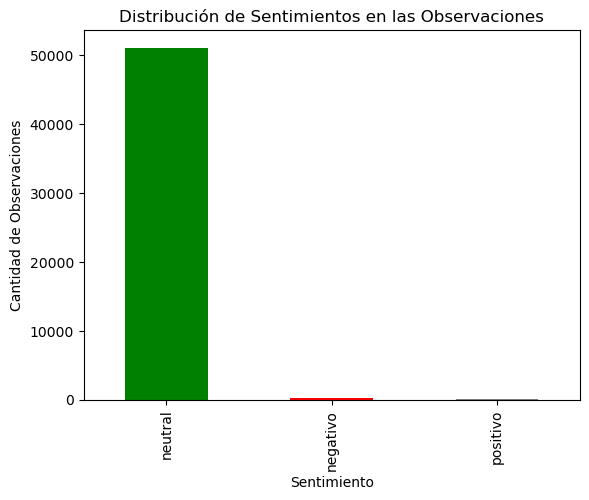

In [21]:
import matplotlib.pyplot as plt

# Contar la cantidad de observaciones por clasificación de sentimiento
sentimientos = df_resultados['clasificacion_sentimiento'].value_counts()

# Graficar
sentimientos.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Distribución de Sentimientos en las Observaciones')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de Observaciones')
plt.show()


In [15]:
#print(df_visitas.head())
print(df_visitas.info())
#print(df_visitas.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Código Visita              70 non-null     object        
 1   CAP                        70 non-null     object        
 2   N° Visita                  66 non-null     float64       
 3   N° Visita Total            66 non-null     float64       
 4   Cargar Fotos               70 non-null     int64         
 5   Cargar Respuestas          70 non-null     int64         
 6   Ver Evidencia              70 non-null     int64         
 7   Formato de requerimientos  70 non-null     int64         
 8   Fecha Planeada Inicio      70 non-null     datetime64[ns]
 9   Semana                     70 non-null     int64         
 10  Coordinador                0 non-null      float64       
 11  Visitador                  70 non-null     object        
 12  Revisor   

## Predicción de desempeño.